In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import keras

Using TensorFlow backend.


In [3]:
import os

In [4]:
from pandas import DataFrame

In [5]:
import pandas_datareader as web

In [6]:
stocks = ['AAPL',
'MSFT',
'AMZN',
'GOOG',
'FB',
'V',
'JNJ',
'WMT',
'MA',
'PG',
'UNH',
'JPM',
'HD',
'INTC',
'NVDA',
'VZ',
'TSLA',
'T',
'ADBE',
'NFLX',
'PYPL',
'DIS',
'BAC',
'MRK',
'KO',
'CSCO',
'PFE',
'XOM',
'PEP',
'CMCSA',
'ABBV',
'CRM',
'ORCL',
'CVX',
'ABT',
'LLY',
'NKE',
'AMGN',
'TMO',
'ACN',
'MCD',
'COST',
'BMY',
'DHR',
'AVGO',
'MDT',
'NEE',
'AMT',
'LIN']

In [6]:
# RUN IF YOU ARE DECLARING A NEW MODEL

numInp = 50

model = models.Sequential()
model.add(layers.Dense(100, input_shape=(numInp,), activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(1, activation='relu'))


model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [7]:
def train_model(stock_name, numInp, ml):
    df = web.DataReader(stock_name, 'yahoo', '2018-7-1', '2020-7-1')['Open']
    
    df = df.div(df[0])
    
    data = df.tolist()
    
    data_input = []
    data_output = []

    size = len(data)
    # size = len(data)

    for i in range(numInp, size):
        data_input.append(data[i-numInp:i])
        data_output.append([data[i]])
        
    if ml: model.fit(data_input, data_output, epochs=1)
    else: return data_input, data

In [8]:
def predict(slice_point, days_predicted, data_input, data):
    
    predictions = []
    predictions = model.predict(data_input[0:slice_point])
    predictions = predictions.reshape(len(predictions)).tolist()
    
    for i in range(0, days_predicted):
        predictions.append(float(model.predict([predictions[len(predictions)-50:len(predictions)]])[0][0])* (1 + (np.random.normal()/100)))
    
    DataFrame(predictions, columns=['Data'])['Data'].plot(figsize=(16,6))
    DataFrame(data[50:], columns=['Data'])['Data'].plot()

In [227]:
# RUN IF YOU ARE TRAINING A NEW MODEL

# data_input, data = train_model('ADM', numInp, False)

for stock in stocks:
    train_model(stock, numInp, True)

Train on 453 samples
453/453 [==============================] - 0s 119us/sample - loss: 8.2743e-04 - accuracy: 0.0000e+00
Train on 453 samples
453/453 [==============================] - 0s 110us/sample - loss: 5.3485e-04 - accuracy: 0.0000e+00
Train on 453 samples
453/453 [==============================] - 0s 115us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Train on 453 samples
453/453 [==============================] - 0s 113us/sample - loss: 4.6389e-04 - accuracy: 0.0000e+00
Train on 453 samples
453/453 [==============================] - 0s 113us/sample - loss: 7.8416e-04 - accuracy: 0.0000e+00
Train on 453 samples
453/453 [==============================] - 0s 119us/sample - loss: 4.9023e-04 - accuracy: 0.0000e+00
Train on 453 samples
453/453 [==============================] - 0s 113us/sample - loss: 2.8310e-04 - accuracy: 0.0000e+00
Train on 453 samples
453/453 [==============================] - 0s 119us/sample - loss: 2.9306e-04 - accuracy: 0.0000e+00
Train on 453 samples
453/453

In [230]:
# saving model

model.save("stock_model.h5")

In [9]:
# loading model

model = tf.keras.models.load_model('stock_model.h5')

In [14]:
data_input, data = train_model('V', 50, False)

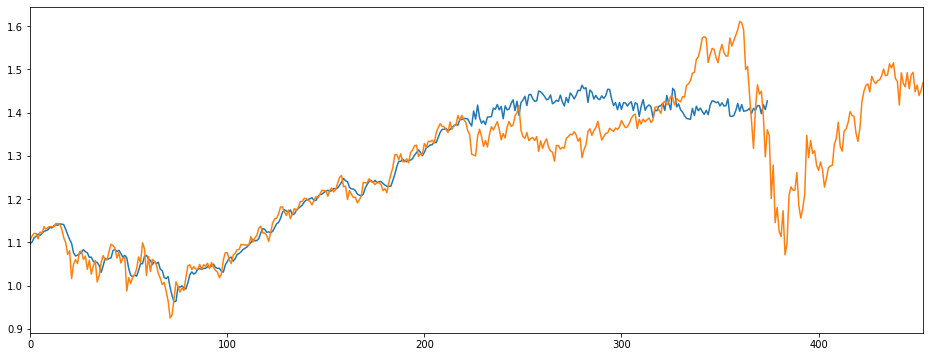

In [16]:
predict(225, 150, data_input, data)